# Task for Today  

***

## Hand Gesture Classification  

Given *tabular data about four hand gestures*, let's try to classify the **gesture** of a given example.

We will use a TensorFlow ANN to make our predictions.

# Getting Started

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix

In [73]:
# import the dataset to train and evaluate the model
dfs = [] #for PCA features
dfs.append(pd.read_csv(r"our_input_30/global_pca4.csv"))
# dfs.append(pd.read_csv(r"our_input_subject2/global_pca3.csv"))
for df in dfs:
    df.columns = list(range(len(df.columns)))
data= pd.concat([df for df in dfs], axis=0).reset_index(drop=True) 

In [74]:
# import the new dataset we want to apply the classifier on
df_mix=[]
df_mix.append(pd.read_csv(r"our_input_30/mix_pca4.csv",header=None))
for dfs in df_mix:
    dfs.columns = list(range(len(dfs.columns)))
df_mix= pd.concat(df_mix, axis=0).reset_index(drop=True)

# Splitting/Scaling

In [75]:
# extraction for features 3PC
X = df.drop(4,axis=1)
y = df.iloc[:, 4]              # output required

#extraction for mixed serie
X_mix = df_mix.drop(4,axis=1)
y_mix = df_mix.iloc[:, 4]              # output required

In [76]:
X

,0,1,2,3
0,2.915820,-0.113688,0.192317,-0.516375
1,0.378810,1.743823,-1.402737,-0.705157
2,4.807794,-0.453074,0.803735,-0.038461
3,4.861231,0.699904,-0.108950,-0.013451
4,6.322312,0.452986,0.272581,0.513936
...,...,...,...,...
56,-2.777546,-0.322470,-0.368047,0.265345
57,-2.227357,-3.057324,1.891228,-0.195134
58,-2.397243,-1.703441,0.617682,0.102284
59,-3.163255,-0.862256,-0.106470,0.265147


In [77]:
y

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
56    1.0
57    1.0
58    1.0
59    1.0
60    1.0
Name: 4, Length: 61, dtype: float64

In [78]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_mix = scaler.fit_transform(X_mix)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

# Training

In [80]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 32
epochs = 50 #50 before

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 796ms/step - accuracy: 0.0202 - loss: 1.9923 - val_accuracy: 1.0000 - val_loss: 1.3582 - learning_rate: 0.0010
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 1.0000 - loss: 1.2506 - val_accuracy: 1.0000 - val_loss: 0.8775 - learning_rate: 0.0010
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 1.0000 - loss: 0.7670 - val_accuracy: 1.0000 - val_loss: 0.4996 - learning_rate: 0.0010
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 1.0000 - loss: 0.4216 - val_accuracy: 1.0000 - val_loss: 0.2557 - learning_rate: 0.0010
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 1.0000 - loss: 0.2139 - val_accuracy: 1.0000 - val_loss: 0.1253 - learning_rate: 0.0010
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 1.0000 - loss: 0.1073 - val_accuracy: 1.0000 - val_loss: 0.0607 - learning_rate: 0.0010
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 1.0000 - loss: 0.0559 - val_accuracy: 1.0

# Results

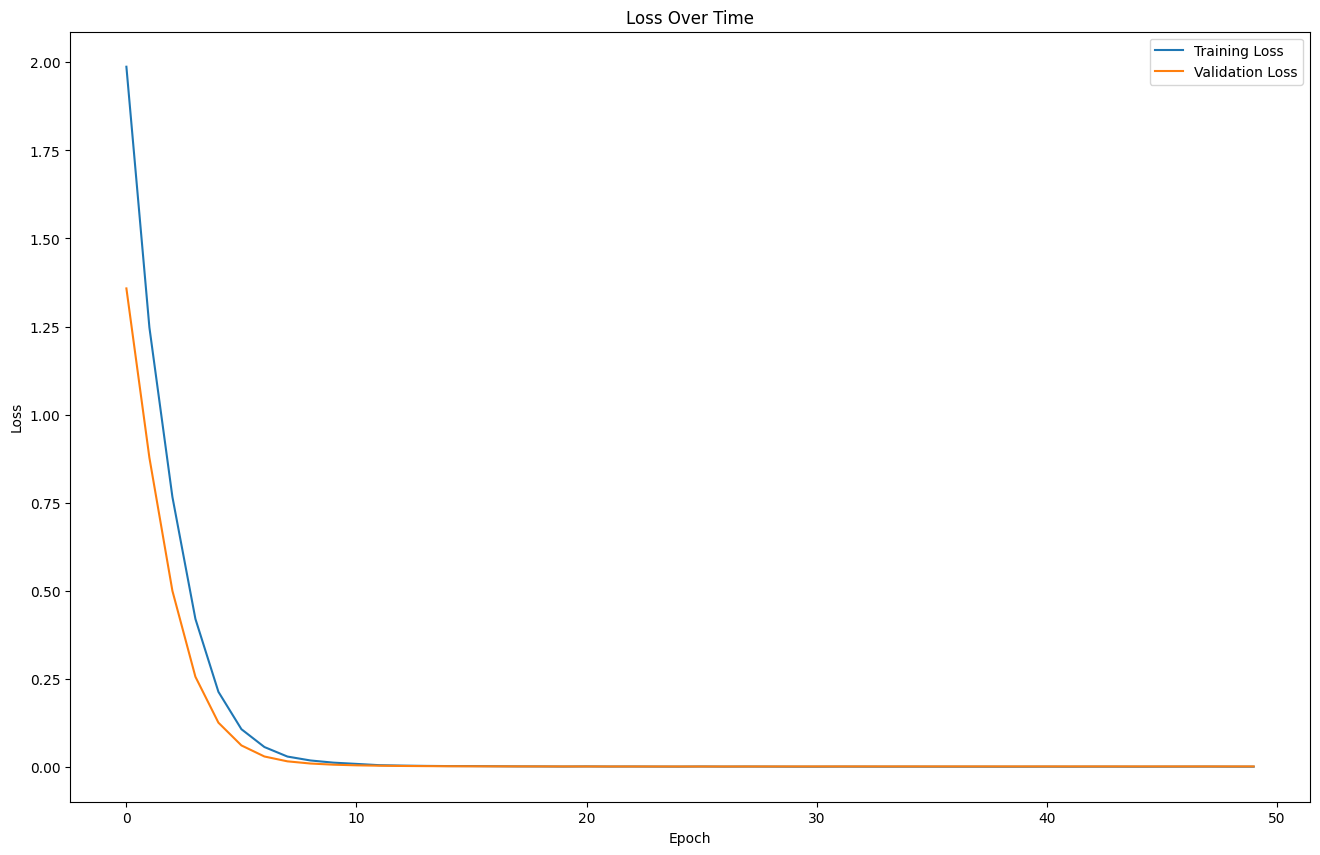

In [81]:
plt.figure(figsize=(16, 10))

plt.plot(range(epochs), history.history['loss'], label="Training Loss")
plt.plot(range(epochs), history.history['val_loss'], label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Over Time")

plt.show()

In [82]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 1.0000 - loss: 2.0676e-04


[0.00020675807900261134, 1.0]

In [83]:
y_true = np.array(y_test)
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


In [84]:
# apply it to the mix movement serie 
y_true_mix = np.array(y_mix)
y_pred_mix = np.array(list(map(lambda x: np.argmax(x), model.predict(X_mix))))
print(y_pred_mix,y_true_mix)
accuracy_score(y_true_mix,y_pred_mix)
df = pd.DataFrame(y_pred_mix)
print(accuracy_score(y_true_mix,y_pred_mix))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
[0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.5806451612903226


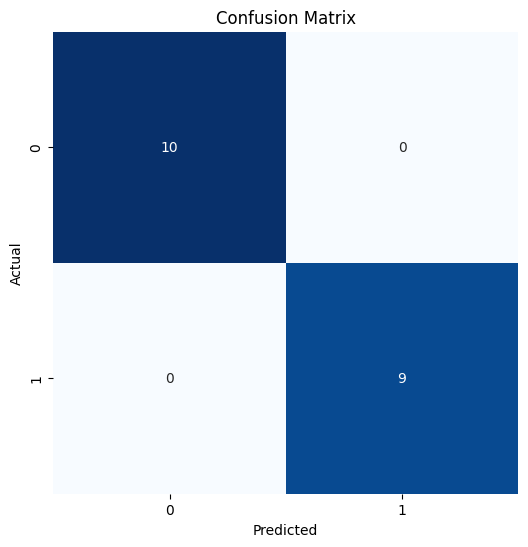

In [85]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [86]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



# Data Every Day  

This notebook is featured on Data Every Day, a YouTube series where I train models on a new dataset each day.  

***

Check it out!  
https://youtu.be/8HLUmsMV2ho